In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
merged = pd.read_csv('../data_format1/use_data/merged_dataset.csv')
merged.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,149002,282,885,3791,1500.0,1111,0,5.0,2.0
1,149002,282,885,3791,1500.0,1107,0,5.0,2.0
2,109881,230,629,1,1662.0,820,0,4.0,0.0
3,109881,230,629,1,1662.0,820,0,4.0,0.0
4,109881,230,629,1,1662.0,820,0,4.0,0.0


In [17]:
item_age = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in merged.iterrows():
    if row['item_id'] not in item_age:
        # there may be multiple entries, so default with an empty list
        item_age[row["item_id"]] = [] 
    item_age[row["item_id"]].append(row["age_range"])
sorted(item_age.items())

[(161.0, [3.0, 6.0, 0.0, 4.0]),
 (162.0, [0.0, 4.0]),
 (163.0, [3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 6.0, 3.0]),
 (164.0, [3.0, 3.0, 3.0, 3.0]),
 (165.0, [0.0, 0.0, 3.0]),
 (166.0, [4.0]),
 (167.0, [5.0, 6.0, 5.0]),
 (168.0,
  [3.0,
   3.0,
   3.0,
   3.0,
   3.0,
   3.0,
   3.0,
   4.0,
   4.0,
   4.0,
   4.0,
   6.0,
   4.0,
   4.0,
   3.0,
   3.0,
   3.0,
   4.0]),
 (169.0, [4.0, 2.0, 3.0, 3.0]),
 (170.0,
  [4.0,
   4.0,
   6.0,
   4.0,
   5.0,
   2.0,
   5.0,
   7.0,
   7.0,
   3.0,
   4.0,
   6.0,
   4.0,
   6.0,
   6.0,
   6.0,
   6.0,
   0.0,
   2.0,
   2.0,
   5.0,
   0.0,
   5.0,
   6.0,
   6.0,
   0.0,
   5.0,
   5.0,
   5.0,
   0.0,
   4.0,
   6.0,
   6.0,
   0.0,
   4.0,
   5.0,
   7.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   5.0,
   6.0,
   5.0,
   3.0,
   0.0,
   4.0,
   6.0,
   6.0,
   4.0,
   2.0,
   3.0,
   6.0,
   4.0,
   6.0,
   6.0,
   6.0,
   3.0,
   7.0,
   4.0,
   5.0,
   3.0,
   7.0,
   7.0,
   5.0,
   5.0,
   5.0,
   6.0,
   5.0,
   5.0,
   5.0,
   4.0,
   

In [19]:
item_age_average = {}
for row in item_age.items():
    item_age_average[row[0]] = np.nansum(row[1])/len(row[1])
sorted(item_age_average.items())

[(161.0, 3.25),
 (162.0, 2.0),
 (163.0, 3.5),
 (164.0, 3.0),
 (165.0, 1.0),
 (166.0, 4.0),
 (167.0, 5.333333333333333),
 (168.0, 3.5555555555555554),
 (169.0, 3.0),
 (170.0, 3.762295081967213),
 (171.0, 1.7142857142857142),
 (172.0, 3.5),
 (173.0, 2.574626865671642),
 (174.0, 3.185667752442997),
 (175.0, 2.479899497487437),
 (176.0, 5.472727272727273),
 (177.0, 5.944444444444445),
 (178.0, 3.425373134328358),
 (179.0, 5.166666666666667),
 (180.0, 3.0),
 (181.0, 2.75),
 (182.0, 3.3333333333333335),
 (183.0, 3.892857142857143),
 (184.0, 3.5063291139240507),
 (185.0, 4.571428571428571),
 (186.0, 2.1538461538461537),
 (187.0, 3.0),
 (188.0, 3.0),
 (189.0, 1.8688524590163935),
 (190.0, 3.4047619047619047),
 (191.0, 2.2),
 (192.0, 2.2),
 (193.0, 2.881720430107527),
 (194.0, 4.5),
 (195.0, 3.3),
 (196.0, 3.0),
 (197.0, 2.4444444444444446),
 (198.0, 3.4375),
 (199.0, 4.0),
 (201.0, 4.478260869565218),
 (202.0, 3.5833333333333335),
 (203.0, 3.3333333333333335),
 (204.0, 4.0),
 (205.0, 5.25),
 (

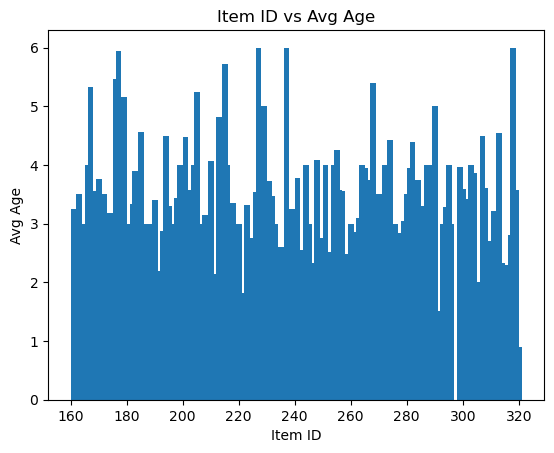

In [21]:
lists = sorted(item_age_average.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y,width=2)
plt.xlabel('Item ID')
plt.ylabel('Avg Age')
plt.title('Item ID vs Avg Age')
plt.show()

In [18]:
item_gender = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in merged.iterrows():
    if row['item_id'] not in item_gender:
        # there may be multiple entries, so default with an empty list
        item_gender[row["item_id"]] = [] 
    item_gender[row["item_id"]].append(row["gender"])
sorted(item_gender.items())

[(161.0, [0.0, 0.0, 1.0, 1.0]),
 (162.0, [1.0, 0.0]),
 (163.0, [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]),
 (164.0, [0.0, 0.0, 0.0, 0.0]),
 (165.0, [0.0, 0.0, 0.0]),
 (166.0, [1.0]),
 (167.0, [0.0, 0.0, 2.0]),
 (168.0,
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   2.0,
   0.0,
   0.0,
   2.0,
   0.0,
   0.0,
   0.0,
   2.0,
   2.0,
   0.0,
   0.0,
   0.0]),
 (169.0, [0.0, 0.0, 1.0, 1.0]),
 (170.0,
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   

In [20]:
item_gender_average = {}
for row in item_gender.items():
    item_gender_average[row[0]] = np.nansum(row[1])/len(row[1])
sorted(item_gender_average.items())

[(161.0, 0.5),
 (162.0, 0.5),
 (163.0, 0.375),
 (164.0, 0.0),
 (165.0, 0.0),
 (166.0, 1.0),
 (167.0, 0.6666666666666666),
 (168.0, 0.4444444444444444),
 (169.0, 0.5),
 (170.0, 0.13934426229508196),
 (171.0, 0.0),
 (172.0, 0.3333333333333333),
 (173.0, 0.11940298507462686),
 (174.0, 0.2247557003257329),
 (175.0, 0.5703517587939698),
 (176.0, 0.6727272727272727),
 (177.0, 1.7777777777777777),
 (178.0, 0.3880597014925373),
 (179.0, 0.0),
 (180.0, 1.0),
 (181.0, 0.2),
 (182.0, 0.0),
 (183.0, 0.15476190476190477),
 (184.0, 0.0759493670886076),
 (185.0, 0.19047619047619047),
 (186.0, 0.15384615384615385),
 (187.0, 0.0),
 (188.0, 0.0),
 (189.0, 0.22950819672131148),
 (190.0, 0.09523809523809523),
 (191.0, 0.6),
 (192.0, 1.0),
 (193.0, 0.1935483870967742),
 (194.0, 0.5),
 (195.0, 0.0),
 (196.0, 2.0),
 (197.0, 0.2222222222222222),
 (198.0, 0.53125),
 (199.0, 0.0),
 (201.0, 0.6956521739130435),
 (202.0, 0.4166666666666667),
 (203.0, 0.0),
 (204.0, 0.0),
 (205.0, 1.0),
 (206.0, 0.5),
 (207.0, 0.6

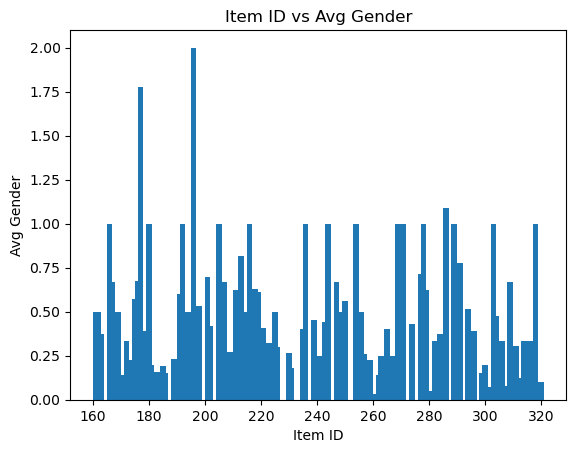

In [22]:
lists = sorted(item_gender_average.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y,width=2)
plt.xlabel('Item ID')
plt.ylabel('Avg Gender')
plt.title('Item ID vs Avg Gender')
plt.show()